# Programing for data analytics project 2

# Question

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
• Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats
• For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
• Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style

# Import Required Libraries:

In [1167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import signal
from datetime import date


# import data and reading the file 
this code loads data from an Excel file into two separate pandas DataFrames (CO2_LUTHI and CO2_LUTHI_new). Each DataFrame corresponds to a specific sheet in the Excel file, and the data can then be analyzed and manipulated using pandas functionalities. The file path and sheet names are specified using raw string literals to handle any potential issues with escape characters or special characters in the file path.



# CO2 LUTHI   


In [1168]:
CO2_LUTHI = pd.read_excel(
    r'C:\Users\fifoa\OneDrive\Desktop\ATU\PFDA-PROJECT-2\CO2 LUTHI.xls', sheet_name='2.  Vostok-TD-Dome C')
CO2_LUTHI_new = pd.read_excel(
    r'C:\Users\fifoa\OneDrive\Desktop\ATU\PFDA-PROJECT-2\CO2 LUTHI.xls', sheet_name='1.  new CO2 data')


# data extraction and slicing  DataFrames 
slicing_params is a list of tuples where each tuple contains the slicing parameters for one DataFrame. The loop iterates through these parameters, extracts the corresponding subset from CO2_LUTHI or CO2_LUTHI_new, and appends the subset to the resulting_dfs list. Finally, the resulting DataFrames are assigned to separate variables with meaningful names.

Data Extraction and Slicing from CO2 LUTHI DataFrames"
"DataFrame Slicing for Multiple Variables in CO2 LUTHI Data"
"Subset Creation from CO2 LUTHI and CO2 LUTHI New DataFrames"
"Analysis: Extracting Specific Data from CO2 LUTHI and CO2 LUTHI New"
"Data Exploration: Selecting Subsets from CO2 LUTHI and CO2 LUTHI New"


This approach makes it easy to add or modify slicing parameters without duplicating code for each DataFrame extraction.

EXAMPLE FROM THE BELOW IS USED TO CREATE BELOW
https://stackoverflow.com/questions/1335392/iteration-over-list-slices

https://medium.com/probably-programming/python-slicing-looping-and-copying-a-list-a2ad96a170ba#:~:text=You%20can%20use%20a%20slice%20in%20a%20for,of%20the%20office%20are%3A%20%3E%3E%3E%20Michael%20%3E%3E%3E%20Dwight








In [1169]:
monnin_luthi = CO2_LUTHI.iloc[6:189, 1:3]
pettit_luthi = CO2_LUTHI.iloc[19:353, 5:7]
siegenthaler_1_LUTHI = CO2_LUTHI.iloc[6:26, 16:18]
siegenthaler_2_LUTHI = CO2_LUTHI.iloc[6:328, 12:14]
luthi_luthi = CO2_LUTHI_new.iloc[16:253, 1:3]

# REPLACING NAMES AND RENAMING COLUMNS 


This loop dynamically renames the columns based on the number of columns in each subset. It uses a list comprehension to create logical column names

In [1170]:
monnin_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)
pettit_luthi.rename(columns=({'Unnamed: 5':'yr_bp', 'Unnamed: 6':'co2_ppmv'}), inplace=True)
siegenthaler_1_luthi.rename(columns=({'Unnamed: 16':'yr_bp', 'Unnamed: 17':'co2_ppmv'}), inplace=True)
siegenthaler_2_luthi.rename(columns=({'Unnamed: 12':'yr_bp', 'Unnamed: 13':'co2_ppmv'}), inplace=True)
luthi_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)

Generating a column to compute the number of years before 2023 and removing row countaining null 






In [1171]:

import pandas as pd

def process_dataframe(df):
    # Rename columns
    df.rename(columns={'Unnamed: 1': 'yr_bp', 'Unnamed: 2': 'co2_ppmv'}, inplace=True)

    # Create a column that calculates the number of years before 2023
    df['years_before_2023'] = 2023 - df['yr_bp']

    # Create a column that calculates the year
    df['calculated_year'] = 2023 + df['years_before_2023']

    # Drop rows with null values
    df.dropna(inplace=True)

# Example usage for each DataFrame
process_dataframe(monnin_luthi)
process_dataframe(pettit_luthi)
process_dataframe(siegenthaler_1_luthi)
process_dataframe(siegenthaler_2_luthi)
process_dataframe(luthi_luthi)


concatenates a list of DataFrames (luthi_frames) into a single DataFrame (luthi_full_co2_data) along a new index, effectively combining the CO2 data from different studies into a unified dataset.

In [1172]:
luthi_frames = [monnin_luthi ,pettit_luthi, siegenthaler_1_luthi, siegenthaler_2_luthi, luthi_luthi]

luthi_full_co2_data = pd.concat(luthi_frames, ignore_index = True)

The code luthi_full_co2_data.head() is displaying the first few rows of the DataFrame luthi_full_co2_data. The head() method in pandas is used to retrieve the top rows of a DataFrame, and by default, it returns the first five rows

In [1173]:
luthi_full_co2_data.head()

,yr_bp,co2_ppmv,years_before_2023,calculated_year
0,137,280.4,1886,3909
1,268,274.9,1755,3778
2,279,277.9,1744,3767
3,395,279.1,1628,3651
4,404,281.9,1619,3642


droping  any rows with missing values in the DataFrame luthi_full_co2_data and information about data types and non-null counts for each column.

In [1174]:
luthi_full_co2_data.dropna(inplace=True)

# Verify the data types and non-null counts
luthi_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   yr_bp              1096 non-null   object
 1   co2_ppmv           1096 non-null   object
 2   years_before_2023  1096 non-null   object
 3   calculated_year    1096 non-null   object
dtypes: object(4)
memory usage: 34.4+ KB


# IPCC CO2 DATA 

IMPORTING DATA 

In [1175]:
CO2_IPCC_data = pd.read_excel(r'C:\Users\fifoa\OneDrive\Desktop\ATU\PFDA-PROJECT-2\CO2 IPCC.xlsx', sheet_name='all records')





# CAPTURING DataFrames FOR specific subsets of data FROM THE ORIGINAL DATA 

In [1176]:
# usING THE SAME ILOC FUNCTION USED FOR THE CO2 LUTHI to create subsets of data from the ORIGINAL dataset
rubino = CO2_IPCC_data.iloc[90:, [83, 86]]
macfarling = CO2_IPCC_data.iloc[137:, 68:70]
monnin = CO2_IPCC_data.iloc[25:120, 2:4]
marcott = CO2_IPCC_data.iloc[31:321, 98:100]
ahn = CO2_IPCC_data.iloc[7:202, 89:91]
bereiter = CO2_IPCC_data.iloc[28:106, 34:36]
bereiter_2 = CO2_IPCC_data.iloc[60:154, 39:41]
schneider = CO2_IPCC_data.iloc[6:, 65:67]
petit = CO2_IPCC_data.iloc[124:348, 7:9]
siegenthaler = CO2_IPCC_data.iloc[6:26, 20:22]
siegenthaler_2 = CO2_IPCC_data.iloc[6:226, 15:17]
bereiter_3 = CO2_IPCC_data.iloc[37:, 102:104]

# RE NAMING THE COLUMNS (SIMILAR TO WHAT WAS DONE WITH CO2 LUTHI)

In [1177]:
rubino.rename(columns=({'Unnamed: 83':'yr_bp', 'Unnamed: 86':'co2_ppmv'}), inplace=True)
macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'yr_bp', 'Unnamed: 69':'co2_ppmv'}), inplace=True)
monnin.rename(columns=({'Unnamed: 2':'yr_bp', 'Unnamed: 3':'co2_ppmv'}), inplace=True)
marcott.rename(columns=({'Unnamed: 98':'yr_bp', 'Unnamed: 99':'co2_ppmv'}), inplace=True)
ahn.rename(columns=({'Unnamed: 89':'yr_bp', 'Unnamed: 90':'co2_ppmv'}), inplace=True)
bereiter.rename(columns=({'Unnamed: 34':'yr_bp', 'Unnamed: 35':'co2_ppmv'}), inplace=True)
bereiter_2.rename(columns=({'Unnamed: 39':'yr_bp', 'Unnamed: 40':'co2_ppmv'}), inplace=True)
schneider.rename(columns=({'Unnamed: 65':'yr_bp', 'Unnamed: 66':'co2_ppmv'}), inplace=True)
petit.rename(columns=({'Unnamed: 7':'yr_bp', 'Unnamed: 8':'co2_ppmv'}), inplace=True)
siegenthaler.rename(columns=({'Unnamed: 20':'yr_bp', 'Unnamed: 21':'co2_ppmv'}), inplace=True)
siegenthaler_2.rename(columns=({'Unnamed: 15':'yr_bp', 'Unnamed: 16':'co2_ppmv'}), inplace=True)
bereiter_3.rename(columns=({'Unnamed: 102':'yr_bp', 'Unnamed: 103':'co2_ppmv'}), inplace=True)

This modification fills NaN values with 0 before attempting to convert the column to integers

In [1178]:
# Loop through each subset and round down the 'yr_bp' column
for subset in [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]:
    subset['yr_bp'] = subset['yr_bp'].fillna(0).apply(lambda x: int(x))

# Example usage for one subset, e.g., rubino
# rubino['yr_bp'] = rubino['yr_bp'].fillna(0).apply(lambda x: int(x))



Round Down Floating-Point Years:

In [1179]:
# Loop through each subset and round down the 'yr_bp' column
for subset in [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]:
    subset['yr_bp'] = subset['yr_bp'].apply(lambda x: int(x))

# Example usage for one subset, e.g., rubino
# rubino['yr_bp'] = rubino['yr_bp'].apply(lambda x: int(x))


In [1180]:
CO2_IPCC_data.head()

,Dome C (0-22 kyr BP),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vostok (0-440 kyr BP),Unnamed: 6,Unnamed: 7,Unnamed: 8,Taylor Dome (19-63 kyr BP),...,Unnamed: 98,Unnamed: 99,Unnamed: 100,"EDC (560-806 kyr, corrected for analytical bias)",Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,Monnin et al. (2001+2004),NaN,NaN,NaN,NaN,Petit et al. (1999),NaN,NaN,NaN,Indermühle et al. (2000),...,NaN,NaN,NaN,Bereiter et al. (2014),NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Pepin et al. (2001),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Raynaud et al. (2005),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,University of Bern,NaN,NaN,NaN,NaN,LGGE Grenoble,NaN,NaN,NaN,University of Bern,...,NaN,NaN,NaN,University of Bern,NaN,NaN,NaN,NaN,NaN,NaN


Concatenate Subsets into One DataFrame:

In [1181]:
# Create a list of subsets
subset_list = [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]

# Concatenate subsets into one DataFrame
composite_data = pd.concat(subset_list, ignore_index=True)


Plot Trending Levels of Carbon Dioxide Over Time:

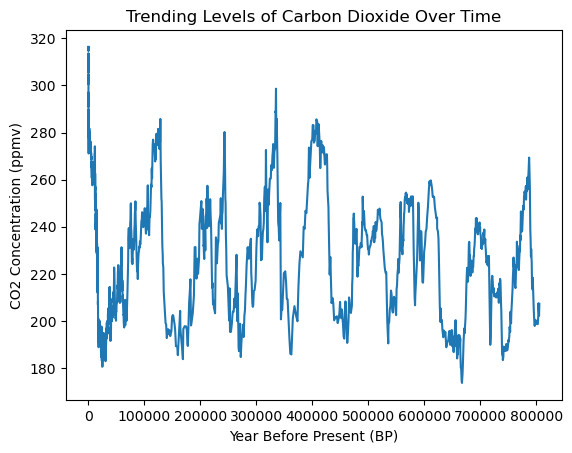

In [1182]:
import matplotlib.pyplot as plt

# Assuming 'yr_bp' and 'co2_ppmv' columns exist in the DataFrame
plt.plot(composite_data['yr_bp'], composite_data['co2_ppmv'])
plt.xlabel('Year Before Present (BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Trending Levels of Carbon Dioxide Over Time')
plt.show()
